In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

X, y = make_classification(n_samples=100, random_state=42)

svm = SVC()

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}


grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)


Best Parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best Score:  0.99


In [6]:
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, Y_train)
y_pred = best_svm.predict(X_test)



In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[63  5]
 [ 7 25]]


C:\Users\jawad\AppData\Local\Temp\ipykernel_13292\2827779939.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


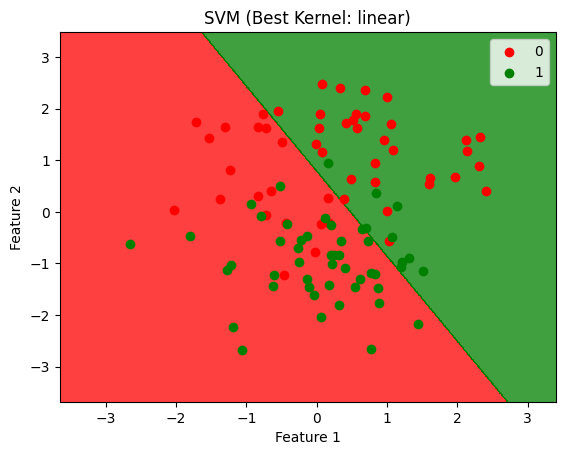

In [8]:
from matplotlib.colors import ListedColormap

X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))


Z = grid_search.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

cmap = ListedColormap(('red', 'green'))

plt.contourf(X1, X2, Z, alpha=0.75, cmap=cmap)

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=cmap(i), label=j)

plt.title('SVM (Best Kernel: {})'.format(best_params['kernel']))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


The SVM model achieved an accuracy of 66.9% on the test set, slightly worse than the performance of the logistic regression model in Lab #4. Both models had a similar confusion matrix. The choice between SVM and logistic regression depends on the specific requirements and priorities of the problem at hand. Further evaluation and analysis, including cross-validation and performance metrics, would provide a more comprehensive assessment of the models' performance.